# Feedback Analysis - Tagging Task

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [3]:
db.collection_names()
hits = db.hits
ts = db.tasksets

## Feedback Scores

How satisfied were people with the tasks?

In [15]:
search = ts.aggregate([
        {'$match':{'meta.test':False, 'meta.type':'image tagging'}},
        {'$project':{
                'form':'$feedback.form',
                'taskSatisfaction':'$feedback.satisfaction',
                'paySatisfaction': '$feedback.pay',
                'time':'$time.workTime',
                'design': '$meta.design', 
                'condition': '$meta.condition',
                'countUserHIT': '$meta.countUserHIT',
                'percentile': '$meta.percentile'
                }}
        ])

feedback = pd.DataFrame(list(search)).convert_objects(convert_numeric=True)
feedback

,_id,condition,countUserHIT,design,form,paySatisfaction,percentile,taskSatisfaction,time
0,3018Q3ZVOIQ43M4MK89VR5MV6SPRAU,fast,NaN,fast,None,NaN,NaN,NaN,119979
1,30BUDKLTXDVIOCN036YEKN7QZPW5EN,fast,NaN,fast,None,NaN,NaN,NaN,120997
2,339ANSOTR52XM0AP6CSB7RO0O80IKW,fast,NaN,fast,None,NaN,NaN,NaN,110059
3,31HQ4X3T3SAX0KV3WOYQQT72L80LSQ,basic,NaN,basic,None,5,NaN,4,195585
4,31LVTDXBL7ALZ5VQHZYL0J2604MRLA,fast,NaN,fast,None,NaN,NaN,NaN,122970
5,31Z0PCVWUKFZ0ZJGHU26HTLNS7AT7F,basic,NaN,basic,None,5,NaN,4,180504
6,32N49TQG3GIWWTL3TSE5S2BYRY2AV6,fast,NaN,fast,None,4,NaN,4,106926
7,32SVAV9L3F9CKKJK9I8Z97JFZG3A36,basic,NaN,basic,None,3,NaN,3,203775
8,32ZKVD547FNH3UOCFW8V4I3LHYP3BV,basic,NaN,basic,"Thank you, I hope I answered these tags correctly",3,NaN,4,1549392
9,337RC3OW052DSCC7QJ3V1GR9KCULVV,basic,NaN,basic,None,2,NaN,3,184918


In [16]:
groups = feedback[['paySatisfaction', 'taskSatisfaction', 'condition']].groupby('condition')
groups.agg([np.mean, 
            np.median, 
            np.var, 
            len, 
            # N
            (lambda x: np.count_nonzero(~np.isnan(x)))
           ])

paySatisfaction                               taskSatisfaction  \
                     mean median       var len <lambda>             mean   
condition                                                                  
basic            3.790698      4  0.931340  61       43         3.790698   
fast             3.947368      4  0.429587  72       38         4.184211   
feedback         4.263158      4  0.538012  57       19         4.250000   

                                         
          median       var len <lambda>  
condition                                
basic        4.0  0.740864  61       43  
fast         4.0  0.370555  72       38  
feedback     4.5  0.723684  57       20

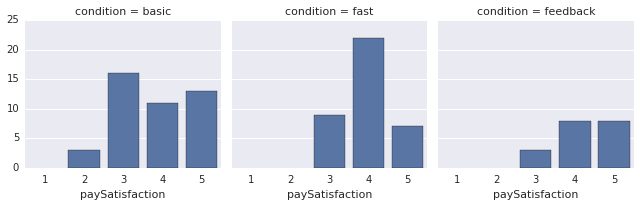

In [22]:
g = sns.FacetGrid(feedback[feedback['paySatisfaction']>0], col='condition', margin_titles=True)
bins = np.linspace(1, 6, 5)
g.map(sns.countplot, "paySatisfaction", order=[1,2,3,4,5]).savefig("../images/paySatisfaction-tag.png")

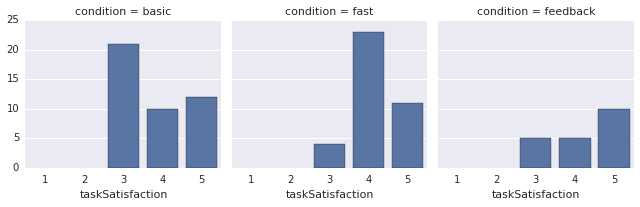

In [23]:
g = sns.FacetGrid(feedback[feedback['taskSatisfaction']>0], col='condition', margin_titles=True)
bins = np.linspace(1, 6, 5)
g.map(sns.countplot, "taskSatisfaction", order=[1,2,3,4,5]).savefig("../images/taskSatisfaction-tag.png")

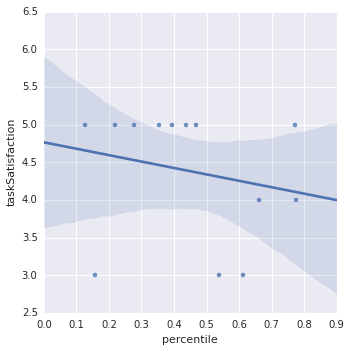

In [20]:
byRank = feedback.query("condition=='feedback' & percentile >0")[['percentile', 'paySatisfaction', 'taskSatisfaction']]
sns.lmplot(y="taskSatisfaction", x="percentile", data = byRank)

In [21]:
byRank['percentileBin'] = byRank['percentile'].apply(lambda x: 1+np.floor_divide(x,0.25))
byRank[['percentileBin', 'paySatisfaction', 'taskSatisfaction']] \
  .groupby('percentileBin') \
  .agg([np.mean, np.median, np.std, len, (lambda x: np.count_nonzero(~np.isnan(x)))])

paySatisfaction                               taskSatisfaction  \
                         mean median       std len <lambda>             mean   
percentileBin                                                                  
1                    4.333333    5.0  1.154701   9        3         4.333333   
2                    4.600000    5.0  0.894427  16        5         5.000000   
3                    4.000000    4.0  0.000000   4        3         3.333333   
4                    4.500000    4.5  0.707107   2        2         4.500000   

                                             
              median       std len <lambda>  
percentileBin                                
1                5.0  1.154701   9        3  
2                5.0  0.000000  16        5  
3                3.0  0.577350   4        3  
4                4.5  0.707107   2        2